# Data Analysis and Visualization with Iris Dataset

## Task 1: Load and Explore the Dataset

We will use the **Iris dataset** accessed via `sklearn.datasets`.  
Steps:
1. Load dataset using Pandas.  
2. Inspect first few rows.  
3. Explore structure & missing values.  
4. Handle missing data (if any).  


In [4]:
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset and convert to DataFrame
try:
    iris = load_iris(as_frame=True)
    df = iris.frame
    df['species'] = df['target'].map(dict(enumerate(iris.target_names)))
    
    print("Dataset loaded successfully!\n")
    display(df.head())
    
    print("\nDataset Info:")
    print(df.info())
    
    print("\nMissing Values per Column:")
    print(df.isnull().sum())
    
    # Handle missing values
    if df.isnull().sum().sum() > 0:
        df = df.fillna({
            col: df[col].mean() if df[col].dtype in ['float64','int64']
            else df[col].mode()[0]
            for col in df.columns
        })
        print("\nMissing values filled.\n")
    else:
        print("\nNo missing values found.\n")

except FileNotFoundError:
    print("Dataset file not found.")
except Exception as e:
    print(f"An error occurred: {e}")


Dataset loaded successfully!



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   species            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None

Missing Values per Column:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
species              0
dtype: int64

No missing values found.



## Task 2: Basic Data Analysis

1. Compute **basic statistics** using `.describe()`.  
2. Perform **grouping by species** to compute mean values.  
3. Identify **patterns and insights**.


In [5]:
# Basic statistics
print("Basic Statistics:")
display(df.describe())

# Group by species
print("\nGroup-wise Mean Values (by species):")
grouped = df.groupby("species").mean(numeric_only=True)
display(grouped)

# Identify interesting findings
print("\nInteresting Findings:")
for col in grouped.columns:
    max_species = grouped[col].idxmax()
    min_species = grouped[col].idxmin()
    print(f"- {col}: '{max_species}' has highest mean, '{min_species}' has lowest mean.")


Basic Statistics:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000



Group-wise Mean Values (by species):


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
species,,,,,
setosa,5.006,3.428,1.462,0.246,0.0
versicolor,5.936,2.770,4.260,1.326,1.0
virginica,6.588,2.974,5.552,2.026,2.0



Interesting Findings:
- sepal length (cm): 'virginica' has highest mean, 'setosa' has lowest mean.
- sepal width (cm): 'setosa' has highest mean, 'versicolor' has lowest mean.
- petal length (cm): 'virginica' has highest mean, 'setosa' has lowest mean.
- petal width (cm): 'virginica' has highest mean, 'setosa' has lowest mean.
- target: 'virginica' has highest mean, 'setosa' has lowest mean.


## Task 3: Data Visualization

1. **Line Chart** → Sepal vs Petal length trends.  
2. **Bar Chart** → Average Petal Length per Species.  
3. **Histogram** → Distribution of Sepal Length.  
4. **Scatter Plot** → Sepal Length vs Petal Length (by species).  

We’ll use **matplotlib** and **seaborn** with custom titles, labels, and legends.


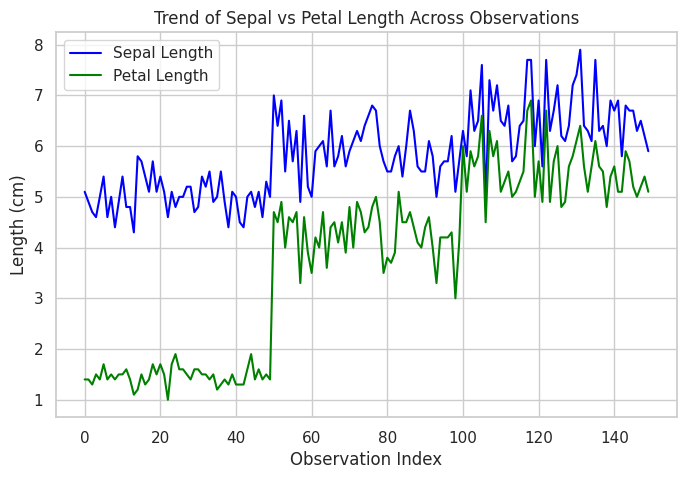

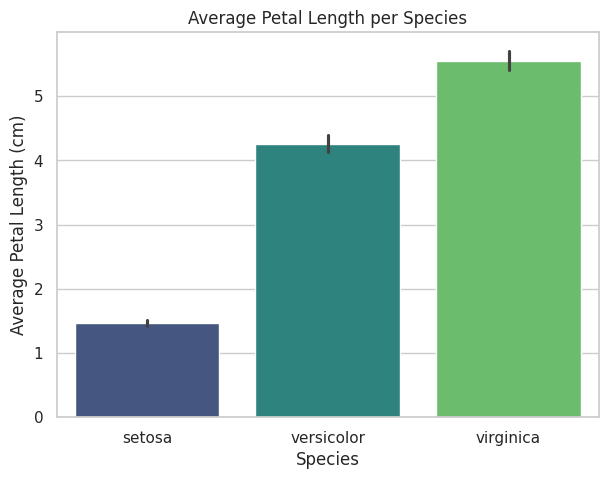

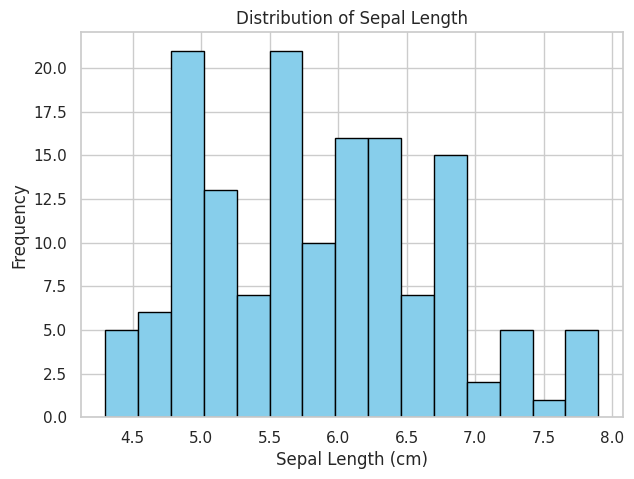

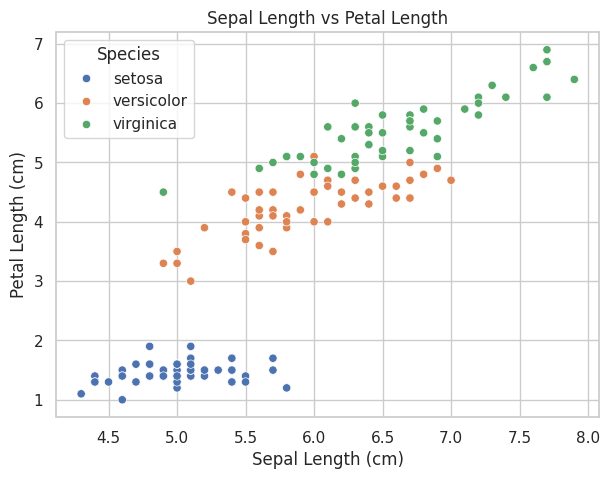

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# 1. Line chart
plt.figure(figsize=(8,5))
plt.plot(df.index, df["sepal length (cm)"], label="Sepal Length", color="blue")
plt.plot(df.index, df["petal length (cm)"], label="Petal Length", color="green")
plt.title("Trend of Sepal vs Petal Length Across Observations")
plt.xlabel("Observation Index")
plt.ylabel("Length (cm)")
plt.legend()
plt.show()

# 2. Bar chart
plt.figure(figsize=(7,5))
sns.barplot(x="species", y="petal length (cm)", hue="species", data=df, estimator="mean", palette="viridis", legend=False)
plt.title("Average Petal Length per Species")
plt.xlabel("Species")
plt.ylabel("Average Petal Length (cm)")
plt.show()

# 3. Histogram
plt.figure(figsize=(7,5))
plt.hist(df["sepal length (cm)"], bins=15, color="skyblue", edgecolor="black")
plt.title("Distribution of Sepal Length")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Frequency")
plt.show()

# 4. Scatter plot
plt.figure(figsize=(7,5))
sns.scatterplot(x="sepal length (cm)", y="petal length (cm)", hue="species", data=df, palette="deep")
plt.title("Sepal Length vs Petal Length")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.legend(title="Species")
plt.show()
